In [1]:
import numpy as np
import pandas as pd
import sympy as sp

from utilities import *

In [2]:
SLOPE_ANGLE = 3 * sp.pi / 360
DETECTOR_ANGLE = 2 * sp.pi / 3
CENTER_WATER_DEPTH = 110

PRECISION = 20

NM_TO_M = 1852
LENGTH = 4 * NM_TO_M
WIDTH = 2 * NM_TO_M

In [3]:
field = Field(length=LENGTH, width=WIDTH, center_depth=CENTER_WATER_DEPTH, slope_angle=SLOPE_ANGLE, precision=PRECISION)

In [11]:
field.arrange_measuring_lines(
    first_left_measuring_line_from_top = 20, 
    direction_angle = 89.9 * sp.pi / 180, 
    detector_angle = DETECTOR_ANGLE
)

finished calc first_left_measuring_line
finished calc top_measuring_lines: 0 in total
finished calc left_measuring_lines : 34 in total


In [17]:
for line in field.measuring_lines['left']:
	print(line.detector_0.loc)
	print(line.detector_0.get_detect_point())
	print(line.get_end_detector().loc)
	print(line.get_end_detector().get_detect_point())

Matrix([[-3684], [-1852], [110]])
(Point3D(-3706.4196086854190695, -1851.9608703614111671, 97.056013175532891850), Point3D(-3659.4500750830256025, -1852.0428477455990992, 95.826072652479326530))
Matrix([[-3677.5352938863995117], [1852.0000000000000000], [110]])
(Point3D(-3700.2353895470865970, 1852.0396191812086490, 96.894073698209852954), Point3D(-3652.6782300590347018, 1851.9566161953318609, 95.648745649802412027))
Matrix([[-3639.54691448652], [-1852], [110]])
(Point3D(-3663.8952282480729771, -1851.9575041326052828, 95.942473084622280120), Point3D(-3612.8850185057152158, -1852.0465338342189939, 94.606723733081124803))
Matrix([[-3633.0822083729195117], [1852.0000000000000000], [110]])
(Point3D(-3657.7110091097391566, 1852.0429854100145334, 95.780533607299205927), Point3D(-3606.1131734817226987, 1851.9529301067119661, 94.429396730404167975))
Matrix([[-3591.26963681685], [-1852], [110]])
(Point3D(-3617.7125775188712610, -1851.9538483152219870, 94.733137814770250453), Point3D(-3562.31408

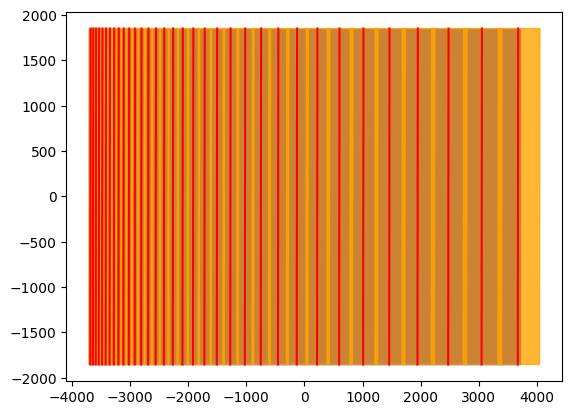

In [13]:
import matplotlib.pyplot as plt

plt.figure()

# plot whole field as a rectangle
plt.fill([- LENGTH / 2, LENGTH / 2, LENGTH / 2, - LENGTH / 2, - LENGTH / 2],
		 [- WIDTH / 2, - WIDTH / 2, WIDTH / 2, WIDTH / 2, - WIDTH / 2],
		 color='blue')

for line in field.measuring_lines['left']:
	plt.plot([line.detector_0.loc[0], line.get_end_detector().loc[0]], [line.detector_0.loc[1], line.get_end_detector().loc[1]], color='red')
	plt.fill([line.detector_0.get_detect_point()[0][0],
		      line.get_end_detector().get_detect_point()[0][0],
			  line.get_end_detector().get_detect_point()[1][0],
			  line.detector_0.get_detect_point()[1][0],
			  line.detector_0.get_detect_point()[0][0]],
			 [line.detector_0.get_detect_point()[0][1],
	 		  line.get_end_detector().get_detect_point()[0][1],
			  line.get_end_detector().get_detect_point()[1][1],
			  line.detector_0.get_detect_point()[1][1],
			  line.detector_0.get_detect_point()[0][1]],
			  color='orange', alpha=0.8)

plt.show()